# SIMPLE LINEAR REGRESSION

### Importing necessary libraries and importing data

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Loading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Let us see what the data is made of

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Let's check if data is having any null values

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


#### Result shows that there are no null values in data.

## Plotting the data to get insights

In [5]:
plt.style.use("fivethirtyeight")

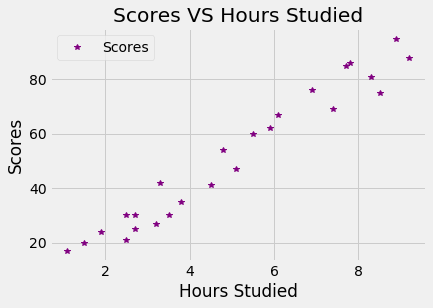

In [6]:
df.plot(x='Hours', y='Scores', style='*',color = "purple")  
plt.title('Scores VS Hours Studied')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

**The graph clearly depicts the linear relation between the two  commodities.**

## **Preparing and Spliting the data**


In [7]:
X =df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Dividing the data into train and test set

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=4) 

In [9]:
X_train #train data

array([[7.7],
       [9.2],
       [5.9],
       [3.2],
       [3.5],
       [7.4],
       [1.9],
       [8.9],
       [2.5],
       [7.8],
       [3.3],
       [5.5],
       [2.7],
       [6.1],
       [2.7],
       [8.3],
       [5.1],
       [1.5],
       [6.9],
       [1.1]])

In [10]:
print("Shape of training data",X_train.shape)
print("Shape of test data",X_test.shape)

Shape of training data (20, 1)
Shape of test data (5, 1)


### **Training the Model**
After preparing and spiliting the data we will now train the model on our normalised data.

In [11]:
from sklearn.linear_model import LinearRegression  
lg = LinearRegression()  
lg.fit(X_train, y_train) 

print("Training of the model is completed.")

Training of the model is completed.


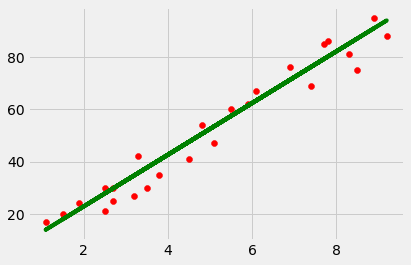

In [12]:
# Plotting the regression line
line = lg.coef_*X+lg.intercept_ #formula for linear regression

# Plotting for the test data
plt.scatter(X, y,color = "red")
plt.plot(X, line,color = "green");
plt.show()

### **Predictions on Model**
After training the model,we will now make predictions with it.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = lg.predict(X_test) # Predicting the scores

[[3.8]
 [4.8]
 [2.5]
 [8.5]
 [4.5]]


In [14]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


In [15]:
# Testing model for a random value
hours = 9.25
own_pred = lg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Resoective predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Resoective predicted Score = 94.43733048038092


### **Evaluating the model**

 Now we will use our trained model to evaluate it on test set.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 6.8866403471761775


In [22]:
#checking the accuracy of model

from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
print("Accuracy of our linear regression model is {}%.".format(r*100))

Accuracy of our linear regression model is 83.45792140066828%.
